
### Continuity Equation and Equation of State


### Using the barotropic equation of state $p_i = (\gamma_i - 1)\rho_i c^2$, this becomes:

$$
\dot{\rho}_i + 3H \gamma_i \rho_i = 0.
$$



### Dimensionless Density Parameter, The dimensionless density parameter is defined as:

$$
\Omega_i = \frac{\kappa_0}{3H^2} \rho_i.
$$

### Taking the time derivative and substituting $\dot{\rho}_i = -3H \gamma_i \rho_i$, we get:

$$
\dot{\Omega}_i = -3 \gamma_i \Omega_i H - 2 \Omega_i \frac{\dot{H}}{H}.
$$



### Rewrite in Terms of E-fold Parameter $N = \ln(a)$, the derivative with respect to $N = \ln(a)$ is:

$$
\Omega_i' = \frac{d\Omega_i}{dN} = \frac{\dot{\Omega}_i}{H}.
$$

### Substituting 
$$
\Omega_i' = -3 \gamma_i \Omega_i - 2 \Omega_i \frac{\dot{H}}{H^2}.
$$

### From the Friedmann equation and continuity equations, we derive:

$$
\frac{\dot{H}}{H^2} = -\frac{3}{2} \sum_i \gamma_i \Omega_i.
$$

### Let $\Pi = \sum_i \gamma_i \Omega_i$, so:

$$
\frac{\dot{H}}{H^2} = -\frac{3}{2} \Pi.
$$

### Substitute $\frac{\dot{H}}{H^2} = -\frac{3}{2} \Pi$ into the equation

$$
\Omega_i' = -3 \gamma_i \Omega_i - 2 \Omega_i \left(-\frac{3}{2} \Pi\right).
$$

### Simplify:

$$
\Omega_i' = 3 (\Pi - \gamma_i) \Omega_i.
$$

### The continuity equations reduce to the dynamical system:

$$
\boxed{\Omega_i' = 3 (\Pi - \gamma_i) \Omega_i},
$$

### where $\Pi = \sum_i \gamma_i \Omega_i$ and the prime denotes a derivative with respect to $N = \ln(a)$.




### Step 2: Sum Over All Components
Summing over all components, we obtain 

$$
\sum_i \Omega_i = \sum_i \frac{8\pi G}{3H^2} \rho_i.
$$

Using the Friedmann equation

$$
\sum_i \Omega_i = \frac{8\pi G}{3H^2} \cdot \frac{3H^2}{8\pi G} = 1.
$$

### The Friedmann equation holds at all times, and the definition of $\Omega_i$ is time-dependent through $H(t)$ and $\rho_i(t)$. However, the sum $\sum_i \Omega_i = 1$ remains valid at all times because it is derived directly from the Friedmann equation, which is a fundamental constraint on the dynamics of the universe.


### The Friedmann equation imposes the constraint:

$$
\boxed{\sum_i \Omega_i = 1},
$$

### which must hold at all times. This ensures that the total energy density of the universe is always equal to the critical density $\rho_c$, consistent with a flat universe.


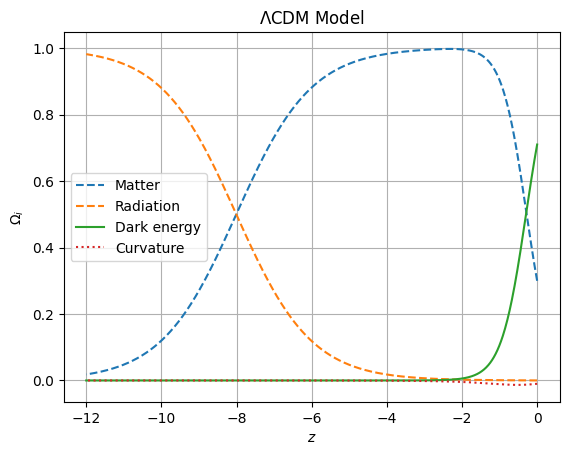

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
#Variables 


eta = np.linspace(0, -12, 1000)     
a = np.exp(eta)
z = 1/a - 1  




gamma = [0,1,4/3,2/3]
#Gamma for each component \gamma = 1 + w 
#Gl = 0 #LCDM
Gl, Gm, Gr, Gk = gamma[0], gamma[1],gamma[2],gamma[3]     # 1, 4/3, 2/3



#Initial conditions
Om0 = 0.3
Or0 = 1e-4
Ok0 = -0.01
Ol0 = 1 - Om0 - Or0 - Ok0


#Solution
def odes(x, eta):
  # for each component  
    Om,Or,Ol,Ok = x[0], x[1], x[2],x[3]

   # LCDM modols

    ode_m = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gm)*Om
    ode_r = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gr)*Or
    ode_l = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gl)*Ol
    ode_k = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gk)*Ok
    

    return [ode_m, ode_r, ode_l, ode_k]

# Initial conditions 
x0 = [Om0, Or0, Ol0, Ok0]
x_lcdm = odeint(odes,x0,eta)

Om_lcdm = x_lcdm[:,0]
Or_lcdm = x_lcdm[:,1]
Ol_lcdm= x_lcdm[:,2]
Ok_lcdm = x_lcdm[:,3]



#Ploteado densidades
plt.plot(eta,x_lcdm[:,0],label='Matter',linestyle='--')
plt.plot(eta,x_lcdm[:,1],label='Radiation',linestyle='--')
plt.plot(eta,x_lcdm[:,2],label='Dark energy')
plt.plot(eta,x_lcdm[:,3],label='Curvature',linestyle=':')
plt.ylabel('$\\Omega_i$')
plt.xlabel('$z$')
plt.legend(loc='best')
plt.title("$\Lambda$CDM Model")
plt.grid()
plt.show()

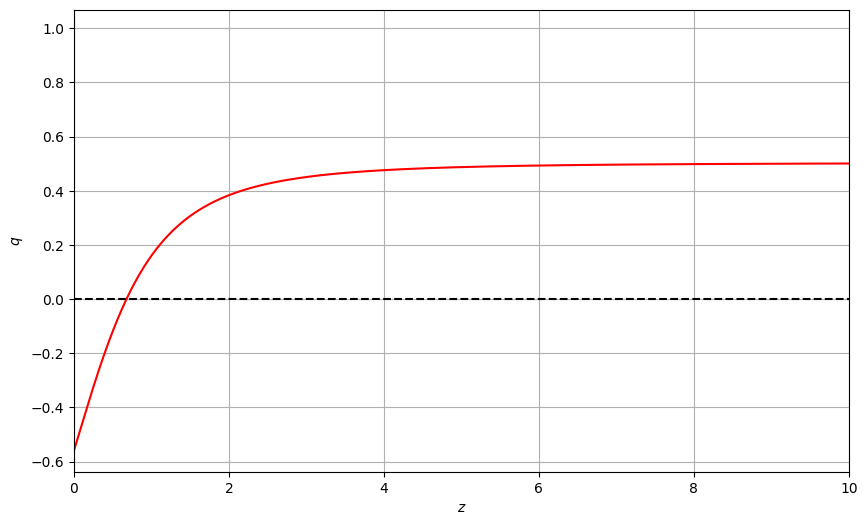

In [2]:

gamma = [0,1,4/3,2/3]


gamma = [0,1,4/3,2/3]
#Gamma for each component \gamma = 1 + w 
#Gl = 0 #LCDM
Gl, Gm, Gr, Gk = gamma[0], gamma[1],gamma[2],gamma[3] 


w_l, w_m, w_r, w_k = Gl - 1, Gm - 1, Gr - 1, Gk - 1

q = 0.5 * (Om_lcdm * (1 + 3 * w_m) + Or_lcdm * (1 + 3 * w_r) + Ol_lcdm * (1 + 3 * w_l) - Ok_lcdm * (1 + 3 * w_k))


# Plot the deceleration parameter q
plt.figure(figsize=(10, 6))
plt.plot(z, q, label='Deceleration Parameter $q$', color='red')
plt.axhline(0, color='black', linestyle='--', label='$q=0$')  # Mark q = 0
plt.ylabel('$q$')
plt.xlabel('$z$')
plt.xlim([0,10])
plt.grid()
plt.show()


### Hubble Parameter with Radiation, Matter, Curvature, and Dark Energy (CPL Parameterization)

### Friedmann Equation

$$
H^2(z) = \frac{8\pi G}{3} \left( \rho_r(z) + \rho_m(z) + \rho_{de}(z) \right),
$$


### Density Parameters

$$
\Omega_i(z) = \frac{\rho_i(z)}{\rho_c(z)},
$$
 The Friedmann equation can then be written in terms of the density parameters:

$$
H^2(z) = H_0^2 \left( \Omega_r(z) + \Omega_m(z) + \Omega_{de}(z) \right),
$$

### The dark energy density evolves as:
$$
   \rho_{de}(z) = \rho_{de,0} \exp \left( 3 \int_0^z \frac{1 + \omega_{de}(z')}{1+z'} dz' \right),
$$

### Using the CPL parameterization $\omega_{de}(z) = \omega_0 + \omega_a \left( \frac{z}{1+z} \right)$, the integral becomes 
$$
   \int_0^z \frac{1 + \omega_{de}(z')}{1+z'} dz' = (1 + \omega_0) \ln(1+z) + \omega_a \left( \frac{z}{1+z} \right).
$$

### The dark energy density parameter is:
$$
   \Omega_{de}(z) = \Omega_{de,0} (1+z)^{3(1+\omega_0)} \exp \left( 3 \omega_a \left( \frac{z}{1+z} \right) \right).
$$

###    If curvature is included, the curvature density parameter evolves as:
$$
   \Omega_k(z) = \Omega_{k,0} (1+z)^2,
$$
###   where $\Omega_{k,0}$ is the present curvature density parameter.

### Hubble Parameter: Combining all the components, the Hubble parameter $ H(z) $ is:

$$
H^2(z) = H_0^2 \left[ \Omega_{r,0} (1+z)^4 + \Omega_{m,0} (1+z)^3 + \Omega_{k,0} (1+z)^2 + \Omega_{de,0} (1+z)^{3(1+\omega_0)} \exp \left( 3 \omega_a \left( \frac{z}{1+z} \right) \right) \right].
$$




### Hubble Parameter with Radiation, Matter, Curvature, and Dark Energy (Logarithmic Parameterization)

###  The logarithmic parameterization for the dark energy equation of state is:

$$
\omega_{de}(z) = \omega_0 + \omega_a \ln(1+z),
$$


###    The dark energy density evolves as:
$$
   \rho_{de}(z) = \rho_{de,0} \exp \left( 3 \int_0^z \frac{1 + \omega_{de}(z')}{1+z'} dz' \right),
$$ 

## Using the logarithmic parameterization $\omega_{de}(z) = \omega_0 + \omega_a \ln(1+z)$, the integral becomes:
$$
   \int_0^z \frac{1 + \omega_{de}(z')}{1+z'} dz' = \int_0^z \frac{1 + \omega_0 + \omega_a \ln(1+z')}{1+z'} dz'.
$$

### This integral can be solved analytically:
$$
   \int_0^z \frac{1 + \omega_0 + \omega_a \ln(1+z')}{1+z'} dz' = (1 + \omega_0) \ln(1+z) + \omega_a \left( \frac{[\ln(1+z)]^2}{2} \right).
$$

# The dark energy density parameter is:
$$
   \Omega_{de}(z) = \Omega_{de,0} (1+z)^{3(1+\omega_0)} \exp \left( \frac{3 \omega_a [\ln(1+z)]^2}{2} \right).
$$


### Hubble Parameter: Combining all the components, the Hubble parameter
$$
H^2(z) = H_0^2 \left[ \Omega_{r,0} (1+z)^4 + \Omega_{m,0} (1+z)^3 + \Omega_{k,0} (1+z)^2 + \Omega_{de,0} (1+z)^{3(1+\omega_0)} \exp \left( \frac{3 \omega_a [\ln(1+z)]^2}{2} \right) \right].
$$


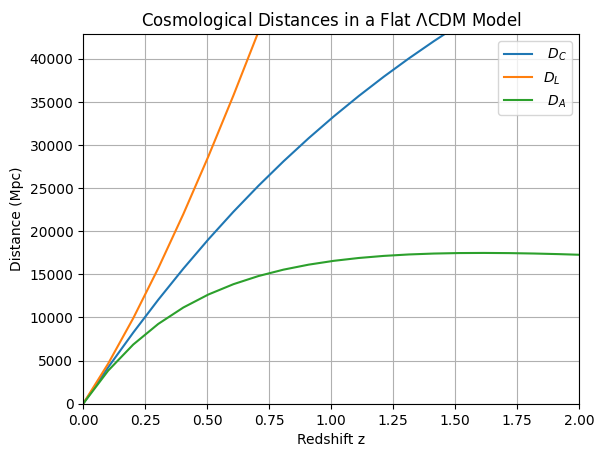

In [4]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Cosmological parameters
H0 = 70  # Hubble constant in km/s/Mpc
c = 3000000  # Speed of light in km/s

# Density parameters
Omega_m = 0.3  # Matter density parameter
Omega_r = 1e-4  # Radiation density parameter
Omega_L = 0.7  # Dark energy density parameter


def E(z):
    return np.sqrt(Omega_r * (1 + z) ** 4 + Omega_m * (1 + z) ** 3 + Omega_L)

def comoving_distance(z):
    integral, _ = integrate.quad(lambda x: 1 / E(x), 0, z)
    return (c / H0) * integral  


def luminosity_distance(z):
    return (1 + z) * comoving_distance(z)


def angular_diameter_distance(z):
    return comoving_distance(z) / (1 + z)

z_values = np.linspace(0, 10.0, 100)
D_C_values = np.array([comoving_distance(z) for z in z_values])
D_L_values = np.array([luminosity_distance(z) for z in z_values])
D_A_values = np.array([angular_diameter_distance(z) for z in z_values])


plt.plot(z_values, D_C_values, label=' $D_C$')
plt.plot(z_values, D_L_values, label='$D_L$')
plt.plot(z_values, D_A_values, label=' $D_A$')
plt.xlabel('Redshift z')
plt.ylabel('Distance (Mpc)')
plt.legend()
plt.grid()
plt.title('Cosmological Distances in a Flat $\Lambda$CDM Model')
plt.ylim(0, c/H0) 
plt.xlim(0,2)
plt.show()

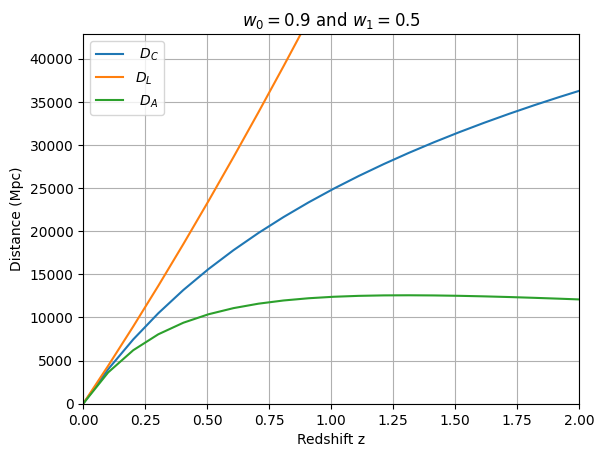

In [5]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Cosmological parameters
H0 = 70  # Hubble constant in km/s/Mpc
c = 3000000  # Speed of light in km/s

# Density parameters
Omega_m = 0.3  # Matter density parameter
Omega_r = 1e-4  # Radiation density parameter
Omega_L = 0.7  # Dark energy density parameter


def E2(z,w0,wa):
    return np.sqrt(Omega_r * (1 + z) ** 4 + Omega_m * (1 + z) ** 3 + Omega_L* (1+z)**(1+w0) * np.exp(3*wa*z/(1+z)))

def comoving_distance2(z):
    integral, _ = integrate.quad(lambda x: 1 / E2(x,0.9,0.5), 0, z)
    return (c / H0) * integral  


def luminosity_distance2(z):
    return (1 + z) * comoving_distance2(z)   


def angular_diameter_distance2(z):
    return comoving_distance2(z) / (1 + z)

z_values = np.linspace(0, 10.0, 100)
D_C_values2 = np.array([comoving_distance2(z) for z in z_values])
D_L_values2 = np.array([luminosity_distance2(z) for z in z_values])
D_A_values2 = np.array([angular_diameter_distance2(z) for z in z_values])


plt.plot(z_values, D_C_values2, label=' $D_C$')
plt.plot(z_values, D_L_values2, label='$D_L$')
plt.plot(z_values, D_A_values2, label=' $D_A$')
plt.xlabel('Redshift z')
plt.ylabel('Distance (Mpc)')
plt.legend()
plt.grid()
plt.title('$w_0 = 0.9 $ and $w_1 = 0.5$')
plt.ylim(0, c/H0) 
plt.xlim(0,2)
plt.show()

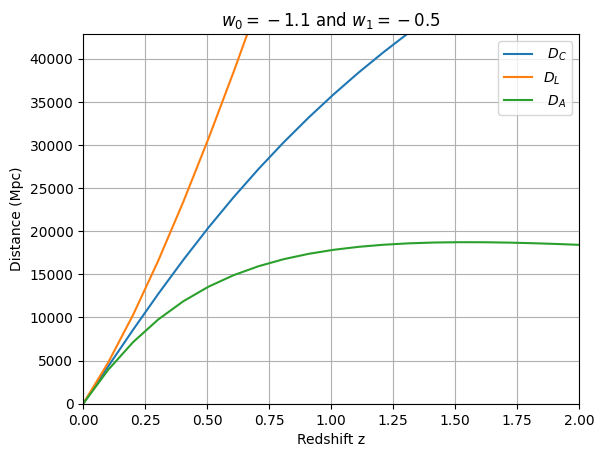

In [6]:
def comoving_distance3(z):
    integral, _ = integrate.quad(lambda x: 1 / E2(x,-1.1,-0.5), 0, z)
    return (c / H0) * integral  


def luminosity_distance3(z):
    return (1 + z) * comoving_distance3(z)   


def angular_diameter_distance3(z):
    return comoving_distance3(z) / (1 + z)


D_C_values3 = np.array([comoving_distance3(z) for z in z_values])
D_L_values3 = np.array([luminosity_distance3(z) for z in z_values])
D_A_values3 = np.array([angular_diameter_distance3(z) for z in z_values])


plt.plot(z_values, D_C_values3, label=' $D_C$')
plt.plot(z_values, D_L_values3, label='$D_L$')
plt.plot(z_values, D_A_values3, label=' $D_A$')
plt.xlabel('Redshift z')
plt.ylabel('Distance (Mpc)')
plt.legend()
plt.grid()
plt.title('$w_0 = -1.1 $ and $w_1 = -0.5$')
plt.ylim(0, c/H0) 
plt.xlim(0,2)
plt.show()

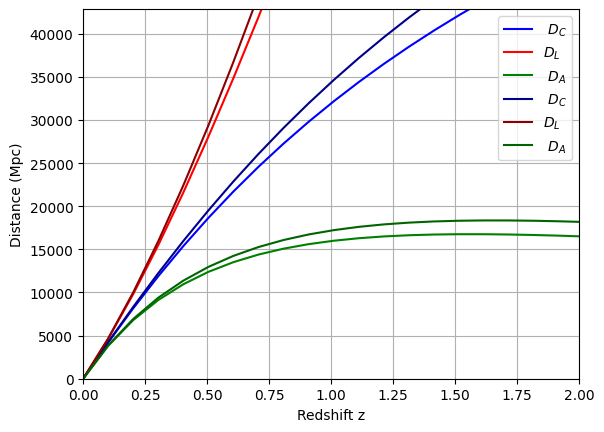

In [139]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Cosmological parameters
H0 = 70  # Hubble constant in km/s/Mpc
c = 3000000  # Speed of light in km/s

# Density parameters
Omega_m = 0.3  # Matter density parameter
Omega_r = 1e-4  # Radiation density parameter

Omega_L = 0.7  # Dark energy density parameter


def E4(z,Omega1,Omega2):
    return np.sqrt( Omega_m * (1 + z) ** 3 +  Omega1 *(1+z)**2 +Omega2*(1+z)  +(1 -Omega_m -Omega1 -Omega2))

def comoving_distance4(z):
    integral, _ = integrate.quad(lambda x: 1 / E4(x,0.2,-0.2), 0, z)
    return (c / H0) * integral  

def comoving_distance5(z):
    integral, _ = integrate.quad(lambda x: 1 / E4(x,-0.2,0.2), 0, z)
    return (c / H0) * integral





def luminosity_distance4(z):
    return (1 + z) * comoving_distance4(z)
def luminosity_distance5(z):
    return (1 + z) * comoving_distance5(z)

def angular_diameter_distance4(z):
    return comoving_distance4(z) / (1 + z)


def angular_diameter_distance5(z):
    return comoving_distance5(z) / (1 + z)

z_values = np.linspace(0, 10.0, 100)
D_C_values4 = np.array([comoving_distance4(z) for z in z_values])
D_L_values4 = np.array([luminosity_distance4(z) for z in z_values])
D_A_values4 = np.array([angular_diameter_distance4(z) for z in z_values])

z_values = np.linspace(0, 10.0, 100)
D_C_values5 = np.array([comoving_distance5(z) for z in z_values])
D_L_values5 = np.array([luminosity_distance5(z) for z in z_values])
D_A_values5 = np.array([angular_diameter_distance5(z) for z in z_values])


plt.plot(z_values, D_C_values4, label=' $D_C $',color = 'blue')
plt.plot(z_values, D_L_values4, label='$D_L $',color = 'red')
plt.plot(z_values, D_A_values4, label=' $D_A $',color ='green')

plt.plot(z_values, D_C_values5, label=' $D_C$', color = 'darkblue')
plt.plot(z_values, D_L_values5, label='$D_L $',color='darkred')
plt.plot(z_values, D_A_values5, label=' $D_A $',color='darkgreen')


plt.xlabel('Redshift z')
plt.ylabel('Distance (Mpc)')
plt.grid()
plt.ylim(0, c/H0) 
plt.xlim(0,2)
plt.legend(loc='best')
plt.show()

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
arr_sn = np.loadtxt('binned_pantheon_15.txt')
z_obs= arr_sn[:,0]
mu_obs = arr_sn[:,1]

/tmp/ipykernel_45912/1729916946.py:25: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  return 5 * sp.log10(D_L(z, Omega_r, Omega_c, Omega_L, w0, wa))  + 6.5


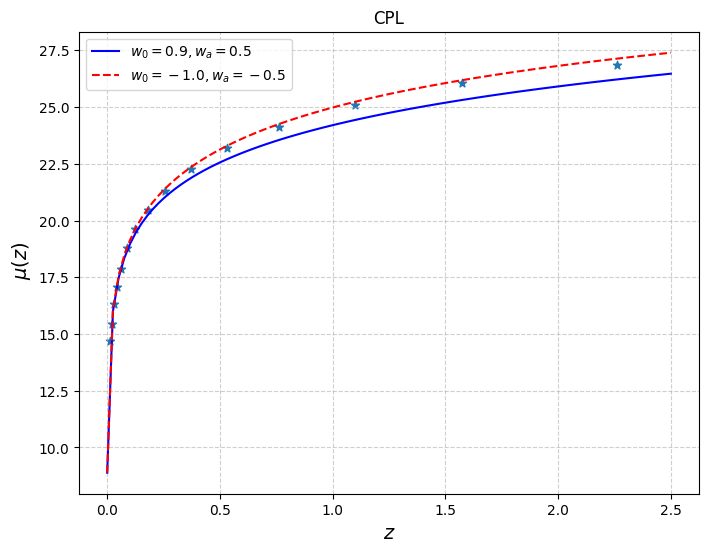

In [5]:



# Constants
c = 299792.458  # Speed of light in km/s

# Redshift range
z_arr = np.linspace(0.001, 2.5, 100)

# Function to compute E(z)
def E(z, Omega_r, Omega_c, Omega_L, w0, wa):
    Omega_Lambda = Omega_L * (1 + z)**(1 + w0) * np.exp(3 * wa * z / (1 + z))
    return 100 * np.sqrt(Omega_c * (1 + z)**3 + Omega_r * (1 + z)**4 + Omega_Lambda)

# Function to compute the angular diameter distance D_A(z)
def D_A(z, Omega_r, Omega_c, Omega_L, w0, wa):
    def integrand(zi):
        return 1.0 / E(zi, Omega_r, Omega_c, Omega_L, w0, wa)
    integral = np.array([np.trapz([integrand(zi) for zi in np.linspace(0, z_i, 100)], np.linspace(0, z_i, 100)) for z_i in np.atleast_1d(z)])
    return (c / 1) * integral / (1 + z)

# Function to compute the luminosity distance D_L(z)
def D_L(z, Omega_r, Omega_c, Omega_L, w0, wa):
    return (1 + z)**2 * D_A(z, Omega_r, Omega_c, Omega_L, w0, wa)

# Function to compute the distance modulus mu(z)
def mu(z, Omega_r, Omega_c, Omega_L, w0, wa):
    return 5 * sp.log10(D_L(z, Omega_r, Omega_c, Omega_L, w0, wa))  + 6.5

# Example usage
mu_1 = mu(z_arr, 1e-4, 0.3, 0.7, 0.9, 0.5)  # Model 1
mu_2 = mu(z_arr, 1e-4, 0.3, 0.7, -1.0, -0.5)  # Model 2

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(z_arr, mu_1, label=r'$w_0=0.9, w_a=0.5$', color='blue', linestyle='-')
plt.plot(z_arr, mu_2, label=r'$w_0=-1.0, w_a=-0.5$', color='red', linestyle='--')
plt.xlabel('$z$', fontsize=14)
plt.ylabel(' $\mu(z)$', fontsize=14)
plt.scatter(z_obs,mu_obs,marker='*')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("CPL")
plt.show()

Text(0.5, 0, '$z$')

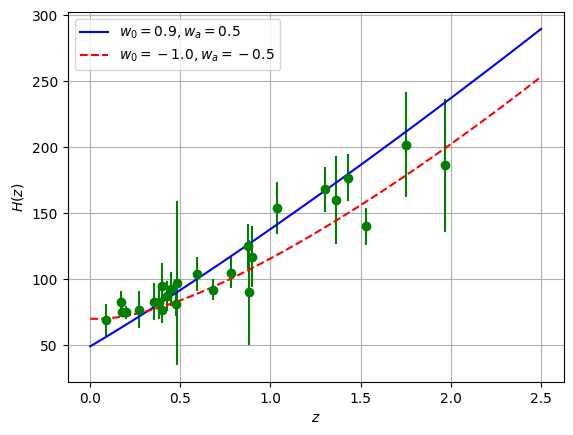

In [6]:

def E2(z, Omega_r, Omega_c, Omega_L, w0, wa):
    Omega_Lambda = Omega_L * (1 + z)**(1 + w0) * np.exp(3 * wa * z / (1 + z))
    return 70 * np.sqrt(Omega_c * (1 + z)**3 + Omega_r * (1 + z)**4 + Omega_Lambda)


Hub_1 =   0.7*E2(z_arr, 1e-4, 0.3, 0.7,0.9, 0.5)  # Model 1
Hub_2 = 0.7*  E(z_arr, 1e-4, 0.3, 0.7, -1.0, -0.5)
arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.plot(z_arr,Hub_1,label=r'$w_0=0.9, w_a=0.5$', color='blue', linestyle='-')
plt.plot(z_arr, Hub_2, label=r'$w_0=-1.0, w_a=-0.5$', color='red', linestyle='--')
plt.legend(loc='best')
plt.grid()
plt.ylabel('$H(z)$')
plt.xlabel('$z$')

In [8]:

def D_A(z, Omega_r, Omega_c, Omega_L,w0,wa):
    def integrand(zi):
        return 1.0 / E(z, Omega_r, Omega_c, Omega_L,w0,wa)
    integral = np.array([np.trapz([integrand(zi) for zi in np.linspace(0, z_i, 100)], np.linspace(0, z_i, 100)) for z_i in np.atleast_1d(z)])
    return (c / 1) * integral / (1 + z)
    
def D_V(z, hrs, Omega_r, Omega_c,Omega_L, w0,wa):
    return (D_A(z, Omega_r, Omega_c,Omega_L, w0,wa)**2*(1 + z)**2*z*c/E(z, Omega_r, Omega_c,Omega_L, w0,wa))**(1/3)/hrs

def D_M(z, hrs, Omega_r, Omega_c, Omega_L,w0,wa):
    return D_A(z, Omega_r, Omega_c, Omega_L,w0,wa)*(1 + z)/hrs

def D_H(z, hrs, Omega_r, Omega_c, Omega_L,w0,wa):
    return c / (hrs*E(z, Omega_r, Omega_c,Omega_L, w0,wa))

In [24]:

def E(z, Omega_r, Omega_c, Omega_L, w0, wa):
    Omega_Lambda = Omega_L * (1 + z)**(1 + w0) * np.exp(3 * wa * z / (1 + z))
    return 100 * np.sqrt(Omega_c * (1 + z)**3 + Omega_r * (1 + z)**4 + Omega_Lambda)

# Function to compute the angular diameter distance D_A(z)
def D_A(z, Omega_r, Omega_c, Omega_L, w0, wa):
    def integrand(zi):
        return 1.0 / E(zi, Omega_r, Omega_c, Omega_L, w0, wa)
    # Use quad for integration
    integral = np.array([quad(integrand, 0, z_i)[0] for z_i in np.atleast_1d(z)])
    return (c / 1) * integral / (1 + z)

# Function to compute the luminosity distance D_L(z)
def D_L(z, Omega_r, Omega_c, Omega_L, w0, wa):
    return (1 + z)**2 * D_A(z, Omega_r, Omega_c, Omega_L, w0, wa)

# Function to compute the distance modulus mu(z)
def mu(z, Omega_r, Omega_c, Omega_L, w0, wa):
    return 5 * np.log10(D_L(z, Omega_r, Omega_c, Omega_L, w0, wa)) + 6.5

# Function to compute D_V(z)
def D_V(z, hrs, Omega_r, Omega_c, Omega_L, w0, wa):
    return (D_A(z, Omega_r, Omega_c, Omega_L, w0, wa)**2 * (1 + z)**2 * z * c / E(z, Omega_r, Omega_c, Omega_L, w0, wa))**(1/3) / hrs

# Function to compute D_M(z)
def D_M(z, hrs, Omega_r, Omega_c, Omega_L, w0, wa):
    return D_A(z, Omega_r, Omega_c, Omega_L, w0, wa) * (1 + z) / hrs

# Function to compute D_H(z)
def D_H(z, hrs, Omega_r, Omega_c, Omega_L, w0, wa):
    return c / (hrs * E(z, Omega_r, Omega_c, Omega_L, w0, wa))



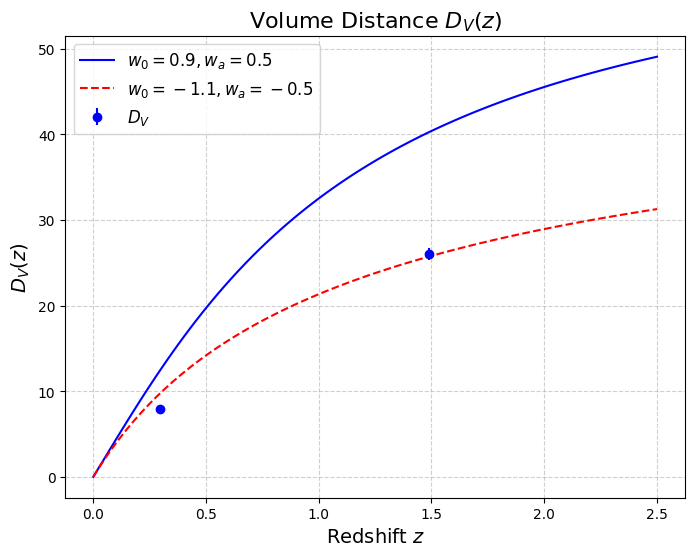

In [23]:
# Load data
cov = np.loadtxt('desi_2024_gaussian_bao_ALL_GCcomb_cov.txt')
data = np.loadtxt('desi_2024_gaussian_bao_ALL_GCcomb_mean.txt')

# Cosmological parameters
Om = 0.3
Om_r = 1e-4
Ode = 0.7
w01, w02 = 0.9, -1.1
wa1, wa2 = 0.5, -0.5
H0 = 69

# Extract values
z_values = data[:, 0]
values = data[:, 1]
labels = data[:, 2]

# Compute errors
errors = np.sqrt(np.diag(cov))

# Separate values by type
D_V_rs = values[labels == 3]
D_M_rs = values[labels == 4]
D_H_rs = values[labels == 5]
z_D_V = z_values[labels == 3]
z_D_M = z_values[labels == 4]
z_D_H = z_values[labels == 5]

# Extract errors corresponding to the data
sigma_D_V = errors[labels == 3]
sigma_D_M = errors[labels == 4]
sigma_D_H = errors[labels == 5]


DV = D_V(z_arr, H0, Omega_r=Om_r, Omega_c=Om, Omega_L=Ode, w0=0.9, wa=0.5)
DV2 = D_V(z_arr, H0, Omega_r=Om_r, Omega_c=Om, Omega_L=Ode, w0=-1.1, wa=-0.5)

DM = D_M(z_arr, H0, Omega_r=Om_r, Omega_c=Om, Omega_L=Ode, w0=w01, wa=wa1)
DM2 = D_M(z_arr, H0, Omega_r=Om_r, Omega_c=Om, Omega_L=Ode, w0=w02, wa=wa2)

DH = D_H(z_arr, H0, Omega_r=Om_r, Omega_c=Om, Omega_L=Ode, w0=w01, wa=wa1)
DH2 = D_H(z_arr, H0, Omega_r=Om_r, Omega_c=Om, Omega_L=Ode, w0=w02, wa=wa2)



# Plotting
plt.figure(figsize=(8, 6))
plt.plot(z_arr, DV2, label=r'$w_0=0.9, w_a=0.5$', color='blue', linestyle='-')
plt.plot(z_arr, DV, label=r'$w_0=-1.1, w_a=-0.5$', color='red', linestyle='--')
plt.xlabel('Redshift $z$', fontsize=14)
plt.ylabel('$D_V(z)$', fontsize=14)
plt.errorbar(z_D_V, D_V_rs, yerr=sigma_D_V, fmt="o", label=r"$D_V$", color="b")
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Volume Distance $D_V(z)$", fontsize=16)
plt.show()

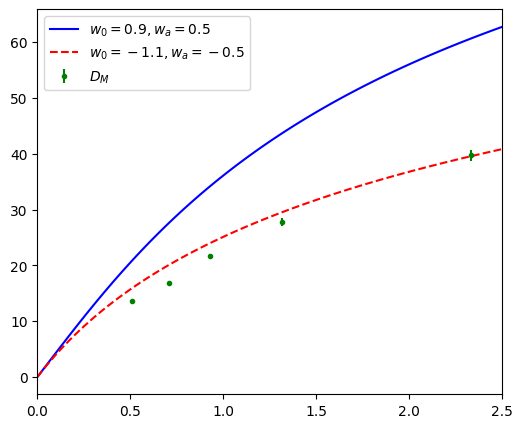

In [27]:
plt.figure(figsize=(6, 5))
plt.plot(z_arr, DM2, label=r'$w_0=0.9, w_a=0.5$', color='blue', linestyle='-')
plt.plot(z_arr, DM, label=r'$w_0=-1.1, w_a=-0.5$', color='red', linestyle='--')
plt.errorbar(z_D_M, D_M_rs, yerr=sigma_D_M, fmt=".", label=r"$D_M$", color="green")
plt.xlim(0, 2.5)
plt.legend()
plt.show()

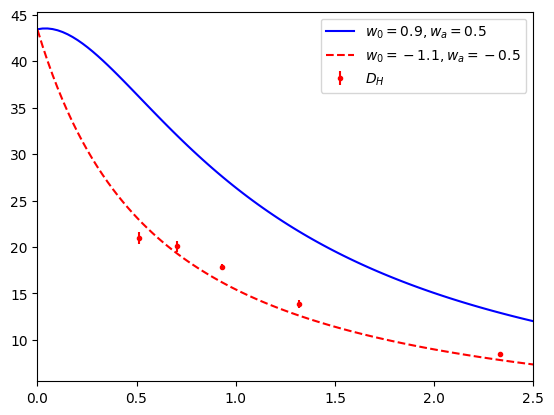

In [30]:
plt.plot(z_arr, DH2, label=r'$w_0=0.9, w_a=0.5$', color='blue', linestyle='-')
plt.plot(z_arr, DH, label=r'$w_0=-1.1, w_a=-0.5$', color='red', linestyle='--')
plt.errorbar(z_D_H, D_H_rs, yerr=sigma_D_H, fmt=".", label=r"$D_H$", color="r")
plt.xlim(0, 2.5)
plt.legend()
plt.show()